In [52]:
from collections import defaultdict
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import gzip
%matplotlib inline
import re

In [2]:
NB = 'classificaNB-t.txt.gz'
SVM = 'classificaSVM-t.txt.gz'
# Nome >> dia/mes/ano hora:min:seg  >> tweet $&% class (0 in favor, 1 against)

In [94]:
def ExtractInfo(data):
    data, klass = data.strip().split(' $&% ')
    name, timedate, tweet = data.split(' >> ')
    day = int(timedate.split('/')[1])
    hour = int(timedate.split(' ')[1].split(':')[0])
    
    return name, day, hour, tweet, int(klass)

def DictC():
    return {0:0,1:0}

def CountClassDay( dataset, targetday ):
    freq = {0:0, 1:0}
    f = gzip.open(dataset)
    for data in f:
        name, day, hour, tweet, klass = ExtractInfo(data)
        if day == targetday:
            freq[klass] += 1
    f.close()
    
    return freq

def TopWordsClass( dataset, targetday ):
    freq = defaultdict(DictC)
    f = gzip.open(dataset)
    for data in f:
        name, day, hour, tweet, klass = ExtractInfo(data)
        if day == targetday:
            for word in tweet.split(' '):
                word = re.sub(r'[^A-Za-z0-9]','', word)
                freq[word][klass] += 1
    f.close()
    
    return freq

def TopUsersDay( dataset, targetday ):
    freq = defaultdict(int)
    f = gzip.open(dataset)
    for data in f:
        name, day, hour, tweet, klass = ExtractInfo(data)
        if day == targetday:
            freq[name] += 1
    f.close()
    
    return freq

def TopUsersClass( dataset, targetday ):
    freq = defaultdict(DictC)
    f = gzip.open(dataset)
    for data in f:
        name, day, hour, tweet, klass = ExtractInfo(data)
        if day == targetday:
            freq[name][klass] += 1
    f.close()
    
    return freq

def KlassHour( dataset, targetday ):
    freq = defaultdict(DictC)
    f = gzip.open(dataset)
    for data in f:
        name, day, hour, tweet, klass = ExtractInfo(data)
        if day == targetday:
            freq[hour][klass] += 1
    f.close()
    
    return freq    

def DictU():
    return defaultdict(int)

def UserHour( dataset, targetday ):
    freq = defaultdict(DictU)
    f = gzip.open(dataset)
    for data in f:
        name, day, hour, tweet, klass = ExtractInfo(data)
        if day == targetday:
            freq[hour][name] += 1
    f.close()
    
    return freq

  Algorithm class   freq
0        NB   PRO  79467
1        NB   CON  23049
2       SVM   PRO  83672
3       SVM   CON  18844


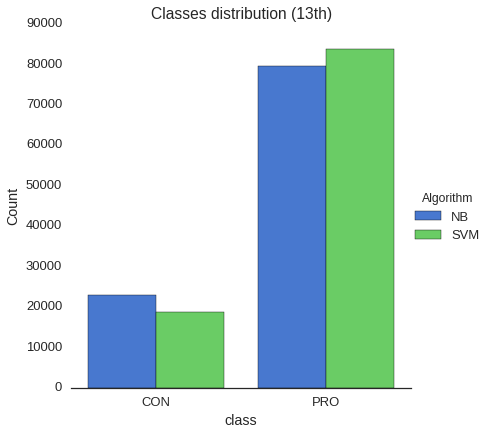

In [41]:
freqNB = CountClassDay( NB, 13 )
freqSVM = CountClassDay( SVM, 13 )

freq = pd.DataFrame({'Algorithm':['NB','NB','SVM','SVM'],'class':['PRO','CON']*2,'freq':[freqNB[0],freqNB[1],freqSVM[0],freqSVM[1]]})
print freq

sns.set(style="white", context="talk")
plt.figure(figsize=(14, 12))

g = sns.factorplot("class", "freq", "Algorithm",
                    data=freq, kind="bar",
                    size=6, palette="muted")
plt.title('Classes distribution (13th)')
g.despine(left=True)
g.set_ylabels("Count")
plt.savefig('classdist13.eps')

  Algorithm class    freq
0        NB   PRO   81202
1        NB   CON  158104
2       SVM   PRO  100452
3       SVM   CON  138854


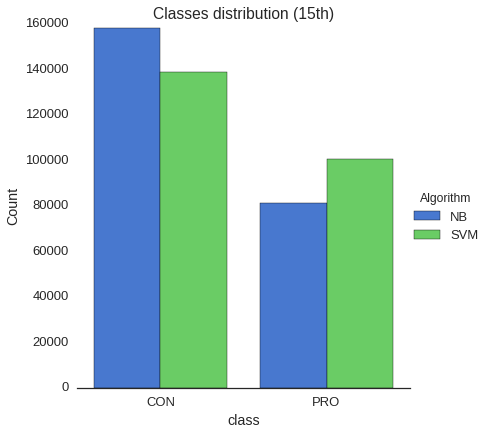

In [42]:
freqNB = CountClassDay( NB, 15 )
freqSVM = CountClassDay( SVM, 15 )

freq = pd.DataFrame({'Algorithm':['NB','NB','SVM','SVM'],'class':['PRO','CON']*2,'freq':[freqNB[0],freqNB[1],freqSVM[0],freqSVM[1]]})
print freq

sns.set(style="white", context="talk")
plt.figure(figsize=(14, 12))

g = sns.factorplot("class", "freq", "Algorithm",
                    data=freq, kind="bar",
                    size=6, palette="muted")
plt.title('Classes distribution (15th)')
g.despine(left=True)
g.set_ylabels("Count")
plt.savefig('classdist15.eps')

   Algorithm Class  Count                   word
0         NB   PRO  69598          globogolpista
1         NB   PRO  13859         dia13diadeluta
2         NB   PRO   9032  domingoeunaovouporque
3        SVM   PRO  70777          globogolpista
4        SVM   PRO  13861         dia13diadeluta
5        SVM   PRO   9057  domingoeunaovouporque
6         NB   CON   8918     vemprarua15demarco
7         NB   CON   5568              foradilma
8         NB   CON   4758              vemprarua
9        SVM   CON   8766     vemprarua15demarco
10       SVM   CON   5584              foradilma
11       SVM   CON   4186              vemprarua


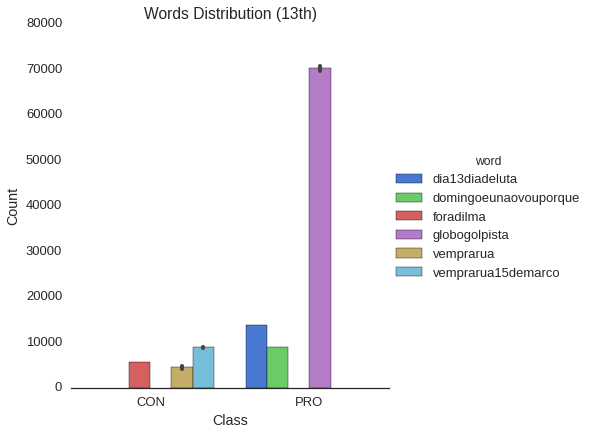

In [75]:
freqNB = TopWordsClass( NB, 13 )
freqSVM = TopWordsClass( SVM, 13 )

pdDict = defaultdict(list)
label = ['PRO','CON']
alg = [('NB',freqNB), ('SVM', freqSVM) ]
for cl in [0,1]:
    for aname, adict in alg:
        for it in sorted(adict.items(), key=lambda x: -x[1][cl])[:3]:
            pdDict['Algorithm'].append(aname)
            pdDict['Class'].append(label[cl])
            pdDict['word'].append(it[0])
            pdDict['Count'].append(it[1][cl])

df = pd.DataFrame(pdDict)
print df

sns.set(style="white", context="talk")
plt.figure(figsize=(14, 12))

g = sns.factorplot("Class", "Count", "word",
                    data=df, kind="bar",
                    size=6, palette="muted")
plt.title('Words Distribution (13th)')
g.despine(left=True)
plt.savefig('worddist13.eps')

   Algorithm Class  Count                     word
0         NB   PRO  60522            globogolpista
1         NB   PRO  28619     familiamarinhonohsbc
2         NB   PRO  13005  menosodiomaisdemocracia
3        SVM   PRO  62264            globogolpista
4        SVM   PRO  29504     familiamarinhonohsbc
5        SVM   PRO  14123                vemprarua
6         NB   CON  81969                foradilma
7         NB   CON  50739                vemprarua
8         NB   CON  32962                   forapt
9        SVM   CON  81444                foradilma
10       SVM   CON  42149                vemprarua
11       SVM   CON  32938                   forapt


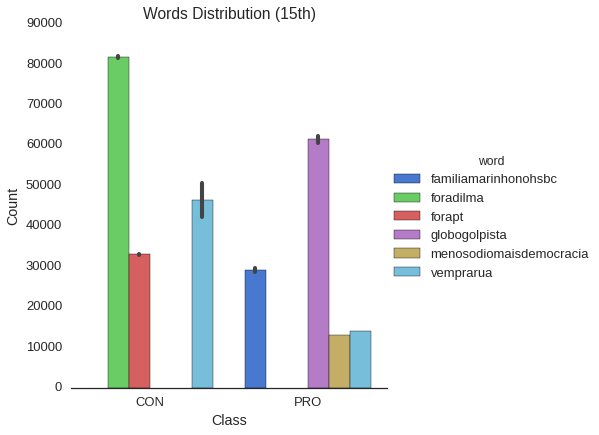

In [74]:
freqNB = TopWordsClass( NB, 15 )
freqSVM = TopWordsClass( SVM, 15 )

pdDict = defaultdict(list)
label = ['PRO','CON']
alg = [('NB',freqNB), ('SVM', freqSVM) ]
for cl in [0,1]:
    for aname, adict in alg:
        for it in sorted(adict.items(), key=lambda x: -x[1][cl])[:3]:
            pdDict['Algorithm'].append(aname)
            pdDict['Class'].append(label[cl])
            pdDict['word'].append(it[0])
            pdDict['Count'].append(it[1][cl])

df = pd.DataFrame(pdDict)
print df

sns.set(style="white", context="talk")
plt.figure(figsize=(14, 12))

g = sns.factorplot("Class", "Count", "word",
                    data=df, kind="bar",
                    size=6, palette="muted")
plt.title('Words Distribution (15th)')
g.despine(left=True)
plt.savefig('worddist15.eps')

   Algorithm Class  Count                     User
0         NB   PRO    746          u'Larissa Alves
1         NB   PRO    359        u'#Dia13DiadeLuta
2         NB   PRO    348                  u'JoaoG
3        SVM   PRO    772          u'Larissa Alves
4        SVM   PRO    369        u'#Dia13DiadeLuta
5        SVM   PRO    358                  u'JoaoG
6         NB   CON    607      u'Br45il No Corrupt
7         NB   CON    213  u'Revista Eletr\xf4nica
8         NB   CON    188             u'#ForaDilma
9        SVM   CON    603      u'Br45il No Corrupt
10       SVM   CON    212  u'Revista Eletr\xf4nica
11       SVM   CON    181             u'#ForaDilma


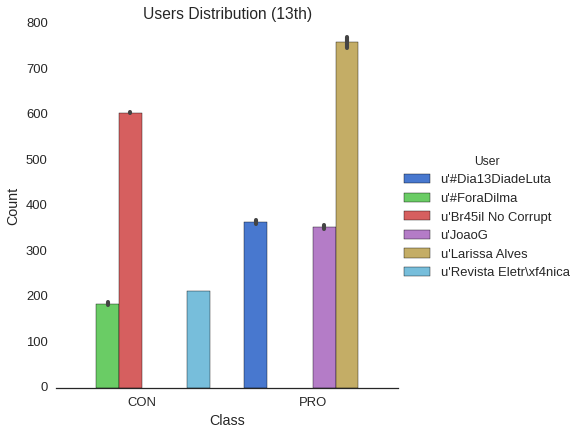

In [77]:
freqNB = TopUsersClass( NB, 13 )
freqSVM = TopUsersClass( SVM, 13 )

pdDict = defaultdict(list)
label = ['PRO','CON']
alg = [('NB',freqNB), ('SVM', freqSVM) ]
for cl in [0,1]:
    for aname, adict in alg:
        for it in sorted(adict.items(), key=lambda x: -x[1][cl])[:3]:
            pdDict['Algorithm'].append(aname)
            pdDict['Class'].append(label[cl])
            pdDict['User'].append(it[0])
            pdDict['Count'].append(it[1][cl])

df = pd.DataFrame(pdDict)
print df

sns.set(style="white", context="talk")
plt.figure(figsize=(14, 12))

g = sns.factorplot("Class", "Count", "User",
                    data=df, kind="bar",
                    size=6, palette="muted")
plt.title('Users Distribution (13th)')
g.despine(left=True)
plt.savefig('userdist13.eps')

   Algorithm Class  Count                   User
0         NB   PRO   1042              u'eduardo
1         NB   PRO    475          u'oConsciente
2         NB   PRO    428        u'S\xe9rgio T. 
3        SVM   PRO   1044              u'eduardo
4        SVM   PRO    890    u'Br45il No Corrupt
5        SVM   PRO    479          u'oConsciente
6         NB   CON   1010    u'Br45il No Corrupt
7         NB   CON    702        u'Rafael soares
8         NB   CON    396  u'Raissa Bittencourt 
9        SVM   CON    701        u'Rafael soares
10       SVM   CON    517    u'Br45il No Corrupt
11       SVM   CON    396  u'Raissa Bittencourt 


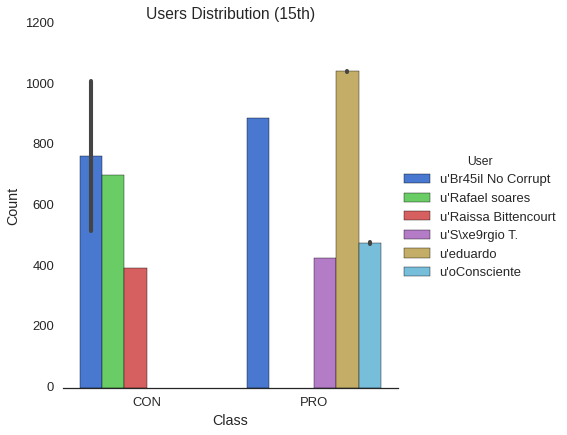

In [78]:
freqNB = TopUsersClass( NB, 15 )
freqSVM = TopUsersClass( SVM, 15 )

pdDict = defaultdict(list)
label = ['PRO','CON']
alg = [('NB',freqNB), ('SVM', freqSVM) ]
for cl in [0,1]:
    for aname, adict in alg:
        for it in sorted(adict.items(), key=lambda x: -x[1][cl])[:3]:
            pdDict['Algorithm'].append(aname)
            pdDict['Class'].append(label[cl])
            pdDict['User'].append(it[0])
            pdDict['Count'].append(it[1][cl])

df = pd.DataFrame(pdDict)
print df

sns.set(style="white", context="talk")
plt.figure(figsize=(14, 12))

g = sns.factorplot("Class", "Count", "User",
                    data=df, kind="bar",
                    size=6, palette="muted")
plt.title('Users Distribution (15th)')
g.despine(left=True)
plt.savefig('userdist15.eps')

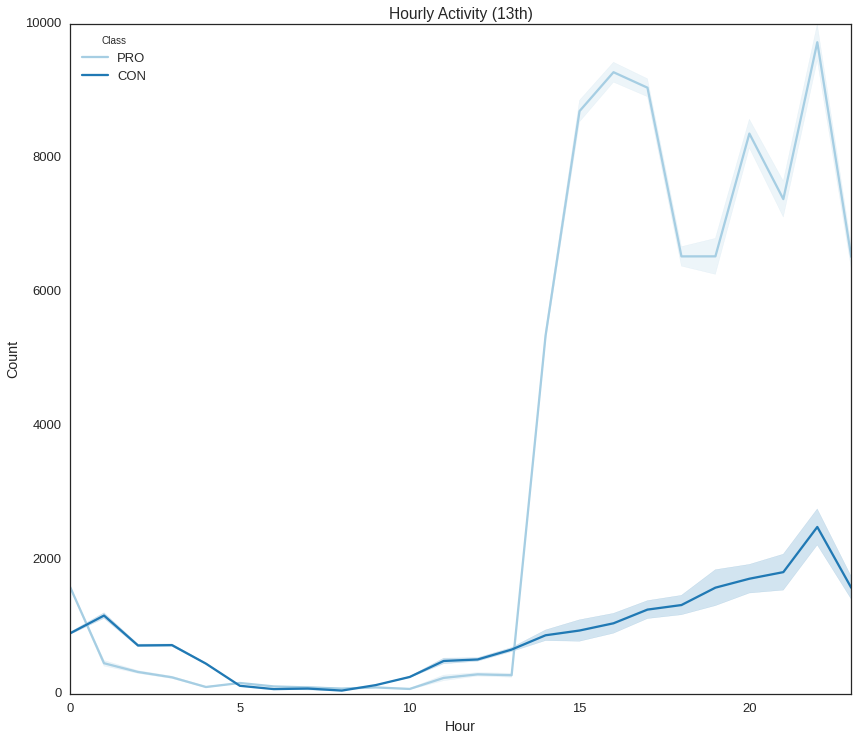

In [90]:
freqNB = KlassHour( NB, 13 )
freqSVM = KlassHour( SVM, 13 )

pdDict = defaultdict(list)
label = ['PRO','CON']
alg = [('NB',freqNB), ('SVM', freqSVM) ]
for cl in [0,1]:
    for aname, adict in alg:
        for it in adict.items():
            pdDict['Algorithm'].append(aname)
            pdDict['Class'].append(label[cl])
            pdDict['Hour'].append(it[0])
            pdDict['Count'].append(it[1][cl])

df = pd.DataFrame(pdDict)

sns.set(style="white", context="talk")
plt.figure(figsize=(14, 12))

g = sns.tsplot(df, time="Hour", unit='Algorithm', condition="Class", value="Count", color="Paired")
plt.title('Hourly Activity (13th)')
plt.savefig('hour13.pdf')

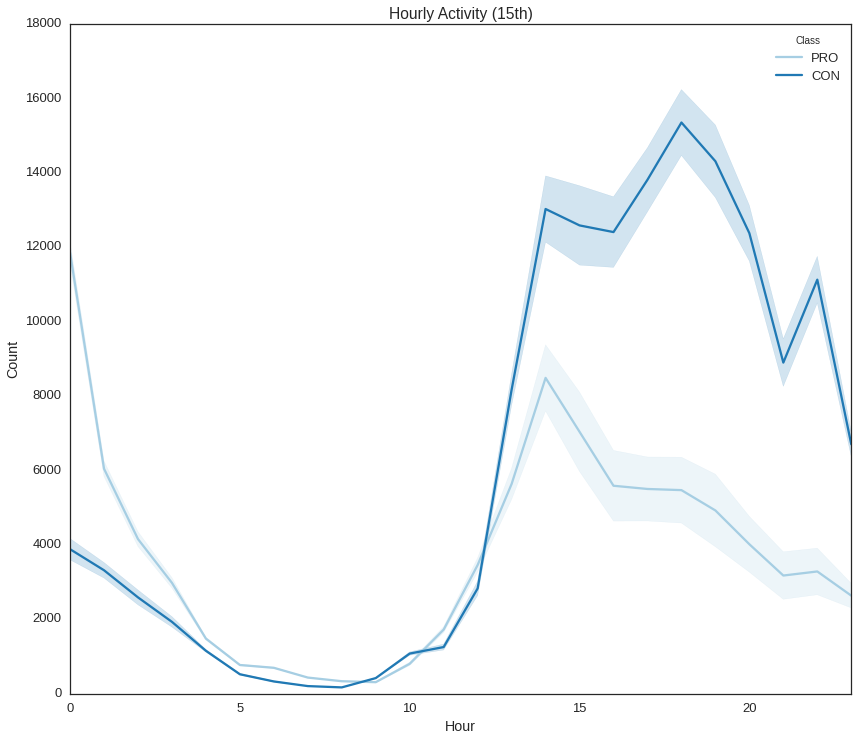

In [91]:
freqNB = KlassHour( NB, 15 )
freqSVM = KlassHour( SVM, 15 )

pdDict = defaultdict(list)
label = ['PRO','CON']
alg = [('NB',freqNB), ('SVM', freqSVM) ]
for cl in [0,1]:
    for aname, adict in alg:
        for it in adict.items():
            pdDict['Algorithm'].append(aname)
            pdDict['Class'].append(label[cl])
            pdDict['Hour'].append(it[0])
            pdDict['Count'].append(it[1][cl])

df = pd.DataFrame(pdDict)

sns.set(style="white", context="talk")
plt.figure(figsize=(14, 12))

g = sns.tsplot(df, time="Hour", unit='Algorithm', condition="Class", value="Count", color="Paired")
plt.title('Hourly Activity (15th)')
plt.savefig('hour15.pdf')

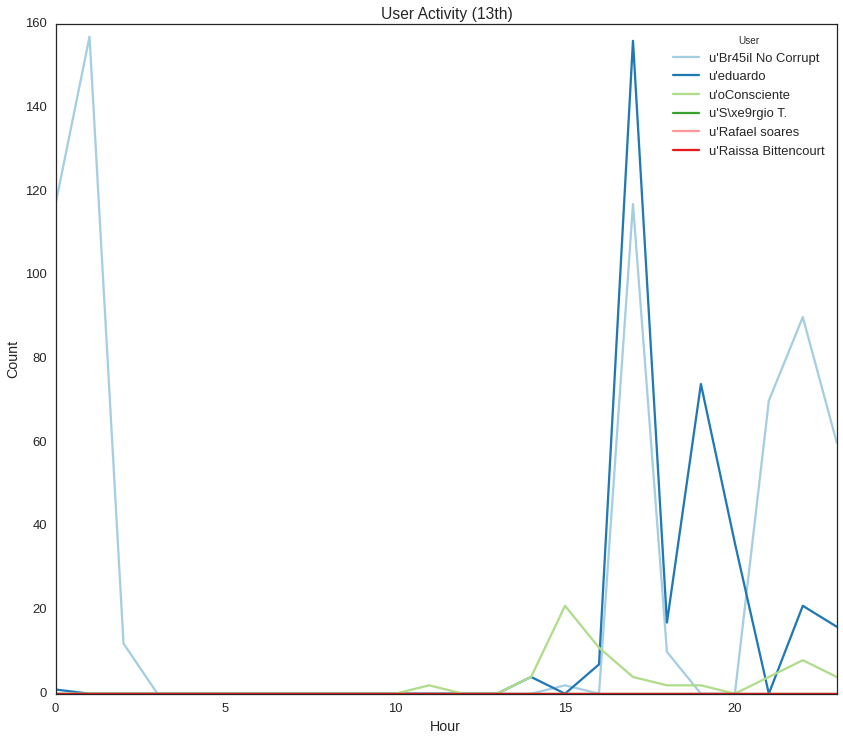

In [109]:
# users activity u'Br45il No Corrupt  u'eduardo

freqNB = UserHour( NB, 13 )
freqSVM = UserHour( SVM, 13 )

pdDict = defaultdict(list)
label = ["u'Br45il No Corrupt",  "u'eduardo", "u'oConsciente", "u'S\\xe9rgio T.", "u'Rafael soares", "u'Raissa Bittencourt"]
alg = [('NB',freqNB), ('SVM', freqSVM) ]
for cl in label:
    for aname, adict in alg:
        for it in adict.items():
            pdDict['Algorithm'].append(aname)
            pdDict['User'].append(cl)
            pdDict['Hour'].append(it[0])
            pdDict['Count'].append(it[1][cl])

df = pd.DataFrame(pdDict)

sns.set(style="white", context="talk")
plt.figure(figsize=(14, 12))

g = sns.tsplot(df, time="Hour", unit='Algorithm', condition="User", value="Count", color="Paired")
plt.title('User Activity (13th)')
plt.savefig('userhour13.pdf')

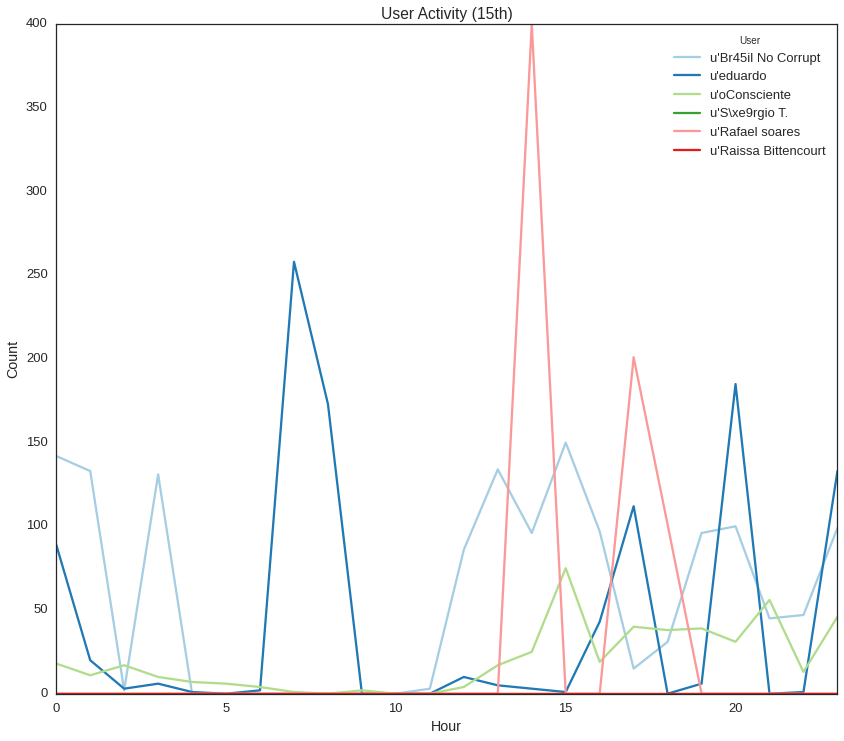

In [110]:
# users activity u'Br45il No Corrupt  u'eduardo

freqNB = UserHour( NB, 15 )
freqSVM = UserHour( SVM, 15 )

pdDict = defaultdict(list)
label = ["u'Br45il No Corrupt",  "u'eduardo", "u'oConsciente", "u'S\\xe9rgio T.", "u'Rafael soares", "u'Raissa Bittencourt"]
alg = [('NB',freqNB), ('SVM', freqSVM) ]
for cl in label:
    for aname, adict in alg:
        for it in adict.items():
            pdDict['Algorithm'].append(aname)
            pdDict['User'].append(cl)
            pdDict['Hour'].append(it[0])
            pdDict['Count'].append(it[1][cl])

df = pd.DataFrame(pdDict)

sns.set(style="white", context="talk")
plt.figure(figsize=(14, 12))

g = sns.tsplot(df, time="Hour", unit='Algorithm', condition="User", value="Count", color="Paired")
plt.title('User Activity (15th)')
plt.savefig('userhour15.pdf')

In [125]:
f = gzip.open(NB)
it = 0
for data in f:
    name, day, hour, tweet, klass = ExtractInfo(data)
    if day == 15 and klass == 0 and name == "u'Br45il No Corrupt":
        print tweet
        it = it+1
        if it > 10:
            break
f.close()

'
amanha dia mostrar orgulho ser brasileiro deixar claro brasil livre vemprarua'
vamos ser 1 milhao ruas chuva estaremos vemprarua'
copa 16hs candelaria'
voz ruas clamando impeachmentdilma nh dando'
temmaisgente ontem kkkkkkkkkkk vamos bombar'
principal desde inicio vem voz povo ruas vemprarua forapt'
viver realidade paralela'
cobertura vemprarua vivo doe'
cobertura vemprarua vivo doe'
cobertura vemprarua vivo doe'
